# Introduction

This notebook demonstrates how to plot time series from the UKESM1 Geoengineering simulations

#### Firstly, import packages and define functions for calculations

In [16]:
'''Import packages for loading data, analysing, and plotting'''
import xarray
import matplotlib
import numpy
import cftime
%matplotlib inline

# Plotting time series computed by the CVDP package

The Climate Variability Diagnostics Package computes a whole bunch of time series. Some of then, such as the Nino3.4 index, need to be treated with caution. But some are really useful.

*Run only one of the following two cells depending whether your Notebook server is at UCL or on your own laptop*  

In [2]:
# Specify the filenames for the 3 scenarios
filenameG6='~/geog0121_shared_space/PMIP_GeoMIP_summary_files/UKESM1_G6sulfur_1850-1900.cvdp_data.1850-2100.nc'
filename245='~/geog0121_shared_space/UKESM1_summary_files/UKESM1_ssp245_1851-1900.cvdp_data.1850-2100.nc'
filename585='~/geog0121_shared_space/UKESM1_summary_files/UKESM1_ssp585_1851-1900.cvdp_data.1850-2100.nc'


First, let us remind ourselves about the difference between the two standard scenarios - SSP585 and SSP245.
Here we will plot the global average temperature over land.

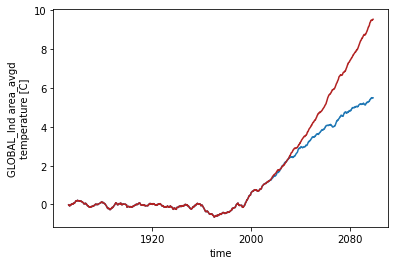

In [3]:
#Start with SSP245
# open the file to get the data
ssp245=xarray.open_dataset(filename245)
# Let smooth this to create a 5-year mean
glt_245=ssp245.ipcc_GLOBAL_lnd_tas
glt_245_smoothed=glt_245.rolling(time=60,center=True).mean() #take the 5-year running mean (i.e. rolling over 60 months)
# create a plot of the variable called ipcc_GLOBAL_lnd_tas
glt_245_smoothed.plot() #by default the first line is blue

#Then move onto SSP585
# open the file to get the data
ssp585=xarray.open_dataset(filename585)
glt_585=ssp585.ipcc_GLOBAL_lnd_tas
glt_585_smoothed=glt_585.rolling(time=60,center=True).mean() #take the 5-year running mean (i.e. rolling over 60 months)
# create a plot of the variable called ipcc_GLOBAL_all_tas
glt_585_smoothed.plot(color='firebrick') #by default the second line is orange

#### Introducing the G6sulfur scenario
So the SSP585 scenario results in the land surface warming by approaching 10oC above preindustrial, which is not pleasant. Perhaps we might want to intervene and deploy some technology to mask out the effect of the increasing carbon dioxide levels. 

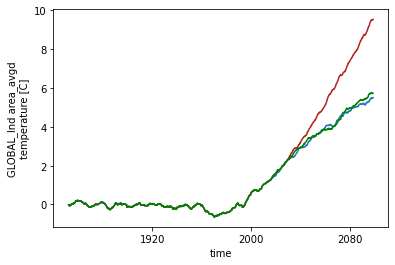

In [6]:
#Now lets look at the G6sulfur experiment...
# open the file to get the data
G6=xarray.open_dataset(filenameG6)
# Let's smooth this to create a 5-year mean
glt_G6=G6.ipcc_GLOBAL_lnd_tas
glt_G6_smoothed=glt_G6.rolling(time=60,center=True).mean() #take the 5-year running mean (i.e. rolling over 60 months)

# create a plot of the variable called nino34.
glt_245_smoothed.plot() #by default the first line is blue
glt_585_smoothed.plot(color='firebrick') 
glt_G6_smoothed.plot(color='green') #by default the second line is orangeglt_G6_smoothed.plot(color='green')

So injecting sulphur into the atmosphere (a bit like artificial volcanoes) can successfully change the temperature trajectory. 

#### What about precipitation though?
We can also look at other properties of the climate system, to see if it masks all the impacts of climate change though. Let us look at regional rainfall. Here will pick the South East Asian summer rainfall, which is roughly akin to the summer monsoon.

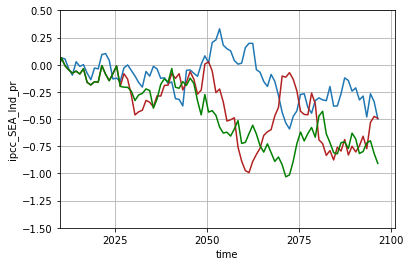

In [23]:
# Let smooth this to create a 5-year mean
sea_245=ssp245.ipcc_SEA_lnd_pr #load the monthly time series
sea_245_seasonal=sea_245.resample(time="QS-DEC").mean()
sea_sm245=sea_245_seasonal[2::4]
sea_sm245_smoothed=sea_sm245.rolling(time=10,center=True).mean() #take the 5-year running mean (i.e. rolling over 60 months)

# Let smooth this to create a 5-year mean
sea_585=ssp585.ipcc_SEA_lnd_pr #load the monthly time series
sea_585_seasonal=sea_585.resample(time="QS-DEC").mean()
sea_sm585=sea_585_seasonal[2::4]
sea_sm585_smoothed=sea_sm585.rolling(time=10,center=True).mean() #take the 5-year running mean (i.e. rolling over 60 months)

# Let smooth this to create a 5-year mean
sea_G6=G6.ipcc_SEA_lnd_pr #load the monthly time series
sea_G6_seasonal=sea_G6.resample(time="QS-DEC").mean()
sea_smG6=sea_G6_seasonal[2::4]
sea_smG6_smoothed=sea_smG6.rolling(time=10,center=True).mean() #take the 5-year running mean (i.e. rolling over 60 months)

sea_sm245_smoothed.plot() #by default the first line is blue
sea_sm585_smoothed.plot(color='firebrick') 
sea_smG6_smoothed.plot(color='green') #by default the second line is orangeglt_G6_smoothed.plot(color='green')

start_date=cftime.Datetime360Day(2010,1,1,0,0,0)
end_date=cftime.Datetime360Day(2100,12,30,0,0,0)
# alter the limits of the axes
matplotlib.pyplot.axis([start_date,end_date, -1.5, 0.5]) #[xmin, xmax, ymin, ymax]; Note that the years are strings 
# add a grid in the background
matplotlib.pyplot.grid(True)

#Finally save the figure to your current directory...
#plt.savefig("nino34_timeseries_plot.pdf")

Here we can see that the geoengineering does not ameliorate the reduction in rainfall over Indonesia. In fact, it makes it even worse.

## Machine dependent locations

In [ ]:
#FOR THE GEOGRAPHY CLUSTER
'''Select file and variable names'''
#first of all specify some names
reference_period='1851-1900'
ssp_names=["ssp126", "ssp245", "ssp370","ssp585"]
directory='/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_ssps.wrt_%s' %reference_period

# determine the filenames for the 3 scenarios
filename126='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory,ssp_names[0],reference_period)
filename245='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory,ssp_names[1],reference_period)
filename585='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory,ssp_names[3],reference_period)


In [ ]:
#FOR YOUR OWN LAPTOP
'''Select file and variable names'''
#first of all specify some names
reference_period='1851-1900'
ssp_names=["ssp126", "ssp245", "ssp370","ssp585"]
directory='Data'

# determine the filenames for the 3 scenarios
filename126='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory,ssp_names[0],reference_period)
filename245='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory,ssp_names[1],reference_period)
filename585='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory,ssp_names[3],reference_period)

#Download the files if they are not already here
import os
import urllib
if not os.path.isfile(filename126):
    !mkdir Data
    urllib.request.urlretrieve("http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1_ssp126_1851-1900.cvdp_data.1850-2100.nc", filename126)
    
if not os.path.isfile(filename245):
    urllib.request.urlretrieve("http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1_ssp245_1851-1900.cvdp_data.1850-2100.nc", filename245)
    
if not os.path.isfile(filename585):
    urllib.request.urlretrieve("http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1_ssp585_1851-1900.cvdp_data.1850-2100.nc", filename585)    